<a href="https://colab.research.google.com/github/Sharonayodele/time_series_analysis/blob/main/timeseries_air_passsengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis
Predicting data the sales forecast of air tickets for an airline company wrt time. It needs two variable : independent and dependent

 The dataset is monhtly passenger list for an airline company

Objective: predict the monthly sales

Other applications:
- Sales forecasting
- prices
- weather forecast



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Load the data set "flights"

In [ ]:
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


The data only has month and year column. We need to add the day. Therefore, we will concatenate month and year co9lumns.

In [ ]:
df['yearmonth'] = "01-" +df["month"].astype(str) + "-" + df['year'].astype(str)
df.head()

,year,month,passengers,yearmonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


We created the "yearmonth" column but the data type isn't datatime, it's an object. It needs to be converted to datetime dtype or we might emcoutner issues later.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearmonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


Convert the yearmonth column to datetime dtype

In [ ]:
df["yearmonth"] = pd.to_datetime(df['yearmonth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearmonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


# Let's set the yearmonth column as the index

In [ ]:
df.set_index('yearmonth', inplace=True)
df.head()

,year,month,passengers
yearmonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


<Axes: xlabel='yearmonth', ylabel='passengers'>

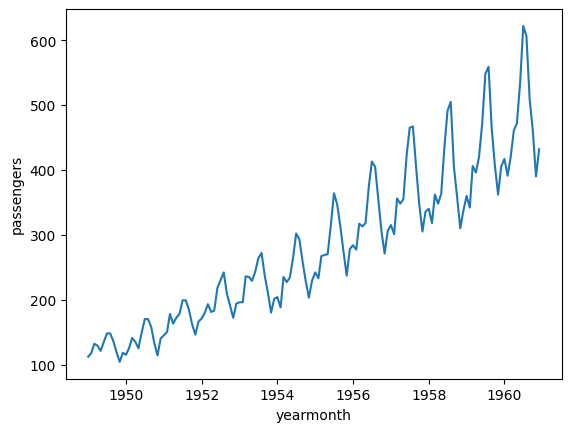

In [ ]:
sns.lineplot(df, x='yearmonth', y='passengers')

## 4 components/patterns of time series
1. Trend: the dependent variable is increasing or decreasing over time
2. Season:the dependent variable is affected by seasonal factors e.g summer, winter or holidays
3. Cyclic:no fixed time. it goes up and down at irregular patterns but it's bound to happen in a cycle.
4. Irregularities: aka noise


In the graph, we can clearly see two patternsL i. seasoanl. ii. trend.
If we start building a model using the data, it might turn out biased due to over fitting. If the data shows the dependent varables is increasing, it would be inaacurate. To combat this we introduce a concept called "Stationarity".

Stationarity: is amethod we use to check the suitability of the data. It simply states the mean or variance doesn't vary over time. That is the trend is straight as opposed to going up or down. We can have three commbinations:
i. Stationary mean & Stationary variance
ii. Stationary mean & non Stationary variance
iii. non Stationary mean & Stationary variance

How do we check for stationarity?
- Eye test on the graph
- ADF: Augmented dickey fuller test: if test statistics < critical values then its's stationary
- Rolling statistics: plot the rolling mean

In [ ]:
df['rollmean'] = df.passengers.rolling(window=12).mean() #window is in months
df['rollStd'] = df.passengers.rolling(window=12).std()

Plot a graph of rolling mean and rollingstd

<Axes: xlabel='yearmonth', ylabel='passengers'>

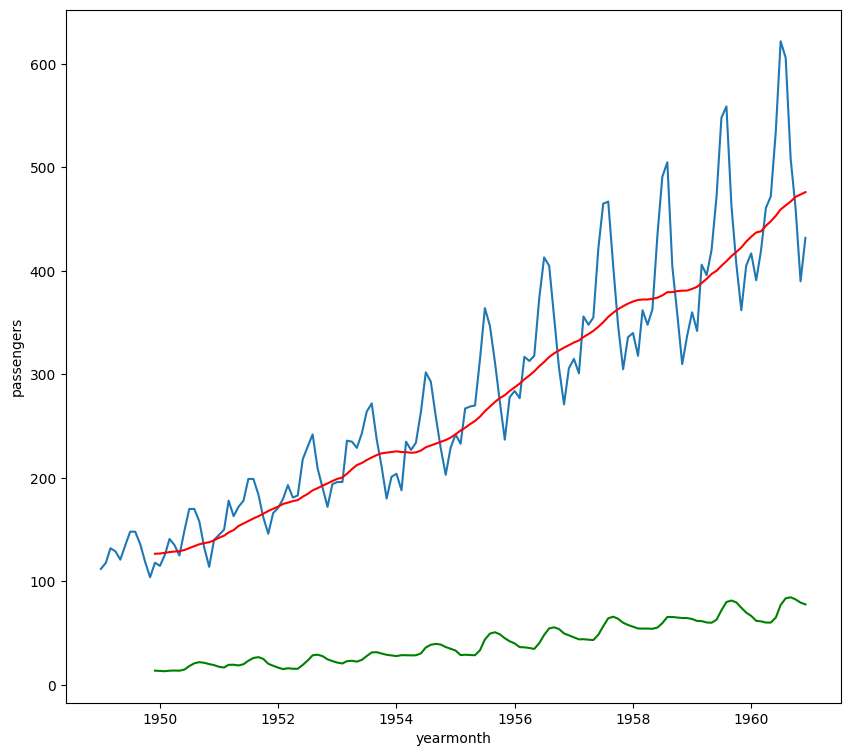

In [ ]:
plt.figure(figsize=(10,9))
sns.lineplot(df, x='yearmonth', y='passengers')
sns.lineplot(df, x='yearmonth', y='rollmean', color='red')
sns.lineplot(df,x='yearmonth', y='rollStd', color='green')

Rollingmean isn't stationary
RollingStd looks fairly constant, so can conclude it's stationary

Let's perform a second test
## ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adftest =adfuller(df['passengers'], autolag='AIC')

In [ ]:
adftest

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
adftest[0:4]

(0.8153688792060498, 0.991880243437641, 13, 130)

In [ ]:
adftest[5]

996.692930839019

In [ ]:
#let's convert the results into a series
stats = pd.Series(adftest[0:4], index=['Test statistics', 'p-value', 'no of Lags used', 'Number of observations used'])
stats

,0
Test statistics,0.815369
p-value,0.991880
no of Lags used,13.000000
Number of observations used,130.000000


In [ ]:
for key, values in adftest[4].items():
  print('Critical value',key,':' ,values)

Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


For the data(stationary =true) then test statistics < critical values.
But in this case, the critical values are less than the test statisitcs. So our data is not stationary

###How to make data stationary
- Time shift(simplest): shifting values by a specific interval
- Log: we find the log of the dependent variables
-Square root, cube: we find the square or cube root of the dependent variables

In [ ]:
def test_stationarity(dataframe, var):
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()

  from statsmodels.tsa.stattools import adfuller
  adftest = adfuller(dataframe[var],autolag='AIC')
  stats = pd.Series(adftest[0:4], index=['Test statistics', 'p-value', 'no of Lags used', 'Number of observations used'])
  print(stats)
  for key, values in adftest[4].items():
    print('Critical value',key,':' ,values)

  plt.figure(figsize=(6,4))
  sns.lineplot(data=dataframe, x=dataframe.index, y=var)
  sns.lineplot(data=dataframe, x=dataframe.index, y='rollmean', color='red')
  sns.lineplot(data=dataframe, x=dataframe.index, y='rollstd', color='green')

In [ ]:
df.head()

,year,month,passengers,rollmean,rollStd
yearmonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


Test statistics                  0.815369
p-value                          0.991880
no of Lags used                 13.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


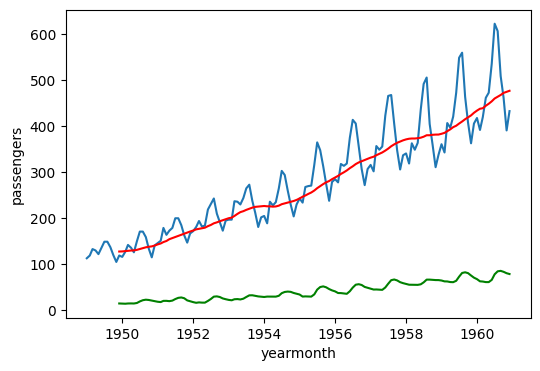

In [ ]:
test_stationarity(df, 'passengers')

In [ ]:
air_df = df[['passengers']]
air_df

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Let's apply time shift

In [ ]:
# time shift
air_df['shift'] = air_df['passengers'].shift() #default vlaue of shift is 1 month. to shift to n months, n=1,2.3...
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
air_df.head()

<ipython-input-91-77f4202a6da6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shift'] = air_df['passengers'].shift() #default vlaue of shift is 1 month. to shift to n months, n=1,2.3...
<ipython-input-91-77f4202a6da6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']


,passengers,shift,shiftDiff
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


<ipython-input-87-023889ecb82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
<ipython-input-87-023889ecb82d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()


Test statistics                 -2.829267
p-value                          0.054213
no of Lags used                 12.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


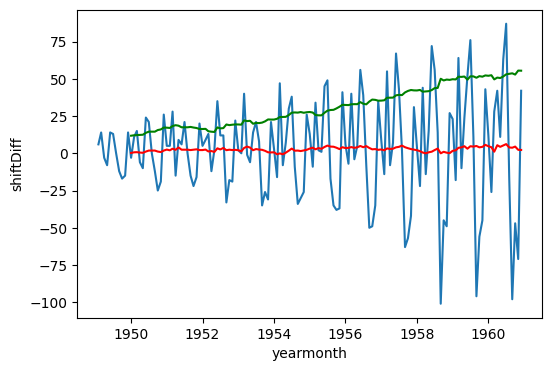

In [ ]:
test_stationarity(air_df.dropna(), 'shiftDiff')

Let's try log method

In [ ]:
log_df = df[['passengers']]
log_df['log'] = np.log(log_df['passengers'])
log_df.head()

<ipython-input-93-0a5c8cae16ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df['log'] = np.log(log_df['passengers'])


,passengers,log
yearmonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


<ipython-input-87-023889ecb82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
<ipython-input-87-023889ecb82d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()


Test statistics                 -1.717017
p-value                          0.422367
no of Lags used                 13.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


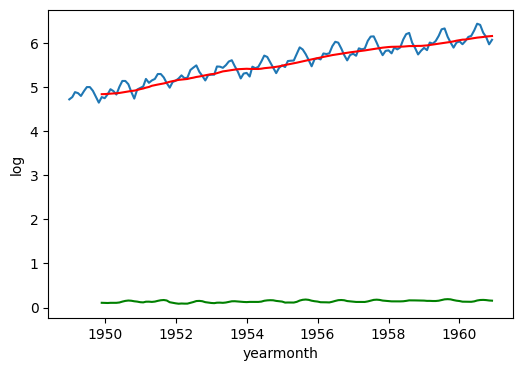

In [ ]:
test_stationarity(log_df, 'log')

Let's try the square method

In [ ]:
sqrt_df = df[['passengers']]
sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])
sqrt_df.head()

<ipython-input-95-4b4cdce957f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sqrt_df['sqrt'] = np.sqrt(sqrt_df['passengers'])


,passengers,sqrt
yearmonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


<ipython-input-87-023889ecb82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
<ipython-input-87-023889ecb82d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()


Test statistics                 -0.345854
p-value                          0.918754
no of Lags used                 13.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


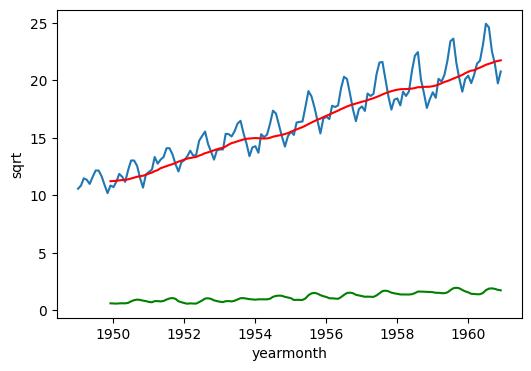

In [ ]:
test_stationarity(sqrt_df, 'sqrt')

  Let's try the cube root method

In [ ]:
cbrt_df = df[['passengers']]
cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])
cbrt_df.head()

<ipython-input-97-179395173d25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbrt_df['cbrt'] = np.cbrt(cbrt_df['passengers'])


,passengers,cbrt
yearmonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


<ipython-input-87-023889ecb82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
<ipython-input-87-023889ecb82d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()


Test statistics                 -0.810035
p-value                          0.816157
no of Lags used                 13.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


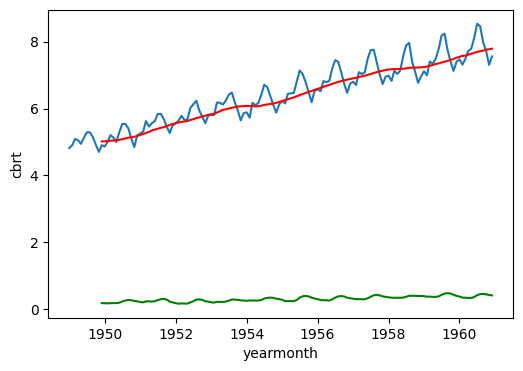

In [ ]:
test_stationarity(cbrt_df, 'cbrt')

  So far, all the results have been the close with time shift providing the best result. Now we will combine square rot and log

###Sqaure root and Log method

In [ ]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2.head()

<ipython-input-99-3877634aa149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt
yearmonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


Test statistics                 -1.942528
p-value                          0.312326
no of Lags used                 13.000000
Number of observations used    130.000000
dtype: float64
Critical value 1% : -3.4816817173418295
Critical value 5% : -2.8840418343195267
Critical value 10% : -2.578770059171598


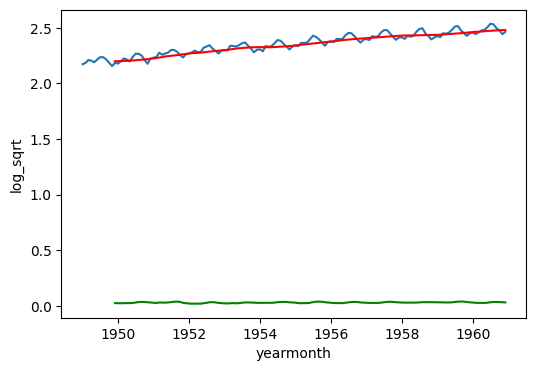

In [ ]:
test_stationarity(log_df2, 'log_sqrt')

Still not much difference. Now let's try time shift in combination with log square root

In [ ]:
log_df2 = log_df[['passengers', 'log']]
log_df2['log_sqrt'] = np.sqrt(log_df2['log'])
log_df2['logshiftDiff'] = log_df2['log_sqrt'] - log_df2['log_sqrt'].shift()
log_df2.head()

<ipython-input-101-d031a3c8bc5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  log_df2['log_sqrt'] = np.sqrt(log_df2['log'])


,passengers,log,log_sqrt,logshiftDiff
yearmonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


<ipython-input-87-023889ecb82d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollmean'] = dataframe[var].rolling(window=12).mean()
<ipython-input-87-023889ecb82d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['rollstd'] = dataframe[var].rolling(window=12).std()


Test statistics                 -2.611019
p-value                          0.090741
no of Lags used                 14.000000
Number of observations used    128.000000
dtype: float64
Critical value 1% : -3.4825006939887997
Critical value 5% : -2.884397984161377
Critical value 10% : -2.578960197753906


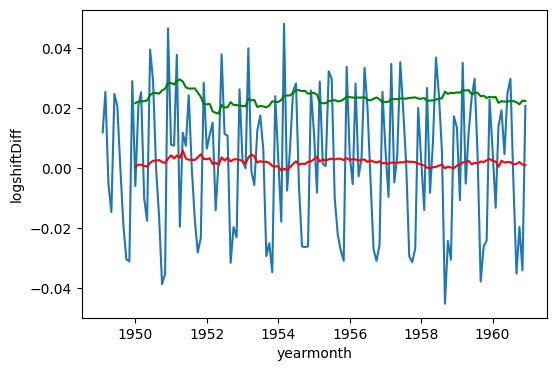

In [ ]:
test_stationarity(log_df2.dropna(), 'logshiftDiff')

Now we get a pretty good result.So lets proceed to building the 'ARIMA' model.

##ARIMA model
We will use both the transformed and original data on the model.

In [ ]:
#we start with the base data
airP = df[['passengers']].copy(deep=True)
airP.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
airP['firstdiff'] = airP['passengers'].diff() #the diff() function from Pandas to calculate the difference between consecutive values in the passengers column.
airP['diff12'] = airP['passengers'].diff(12)
airP.head()

,passengers,firstdiff,diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ARIMA
- AR(AUTO REGRESSUVE): p --> PACF
- I(INTEGRATED): d refers to the shift(1 or 12 months) --> ACF
- MA(MOVING AVERAGE): q

PACF: partial auto correlation function
ACF: Auto correlation function

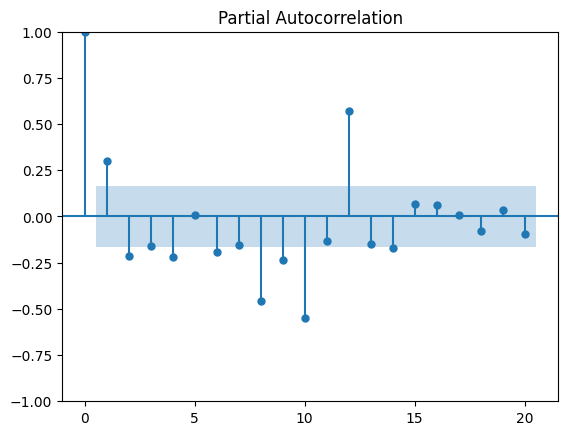

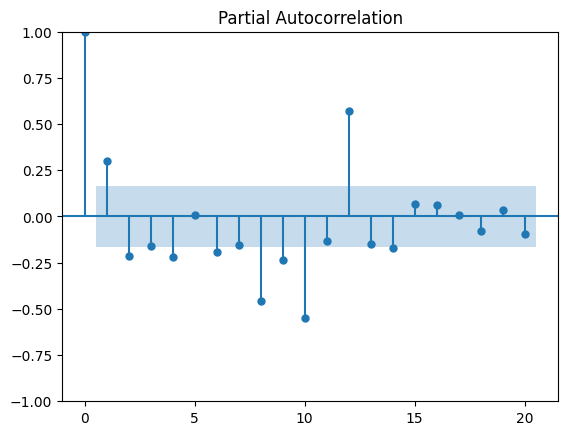

In [ ]:
#lets build our ARI8MA model with the firstdiff
plot_pacf(airP['firstdiff'].dropna(), lags=20)

The shaded area is the insignificant area while the unshaded area is the significant area. The point where the line extend above the origin will be our 'p'.We choose between the point 0 and where the lines regresses into the shades area but we ignore the first value are lag(0)

Let's take P to be 1(order)

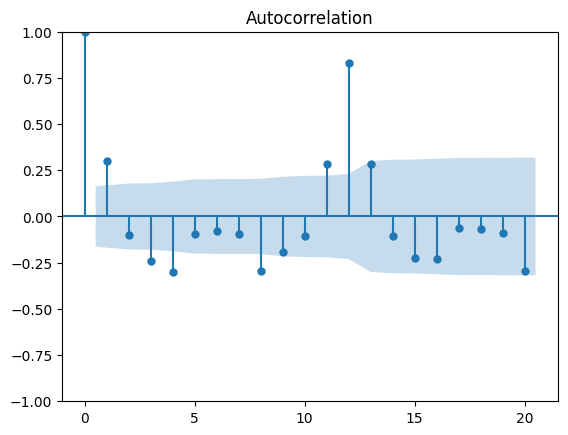

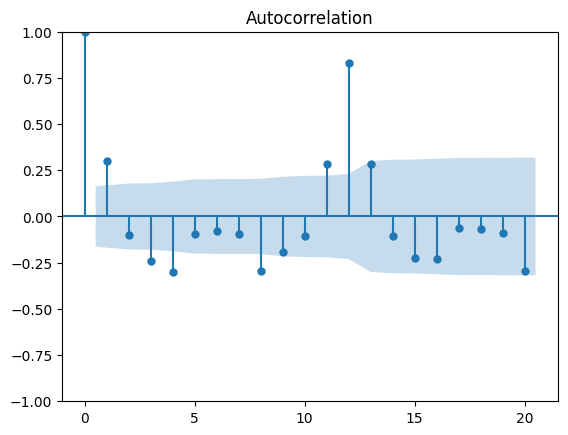

In [ ]:
plot_acf(airP['firstdiff'].dropna(), lags=20)

For the ACF value, (ignoring the first point) we can consider point 1, ppoin 2 is in the insignificant area and then point 3.

Let's take point 3 so q = 3

In [ ]:
# p=1, q=3, d=1


In [ ]:
#Let's the data into test and train sets
train = airP[:round(len(airP) * 0.7)]
test = airP[round(len(airP) * 0.7):]
test.tail()

,passengers,firstdiff,diff12
yearmonth,,,
1960-08-01,606,-16.0,47.0
1960-09-01,508,-98.0,45.0
1960-10-01,461,-47.0,54.0
1960-11-01,390,-71.0,28.0
1960-12-01,432,42.0,27.0


Let's train the data

In [ ]:
model = ARIMA(train['passengers'], order=(1,1,3))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
prediction
airP['arima_pred'] = prediction


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
prediction

,predicted_mean
1957-06-01,363.295709
1957-07-01,351.699792
1957-08-01,346.961970
1957-09-01,344.344094
1957-10-01,342.897590
1957-11-01,342.098327
1957-12-01,341.656695
1958-01-01,341.412672
1958-02-01,341.277838
1958-03-01,341.203335


In [ ]:
airP.tail(12)

,passengers,firstdiff,diff12,arima_pred
yearmonth,,,,
1960-01-01,417,12.0,57.0,341.111334
1960-02-01,391,-26.0,49.0,341.111333
1960-03-01,419,28.0,13.0,341.111333
1960-04-01,461,42.0,65.0,341.111333
1960-05-01,472,11.0,52.0,341.111333
1960-06-01,535,63.0,63.0,341.111333
1960-07-01,622,87.0,74.0,341.111333
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333


<Axes: xlabel='yearmonth', ylabel='passengers'>

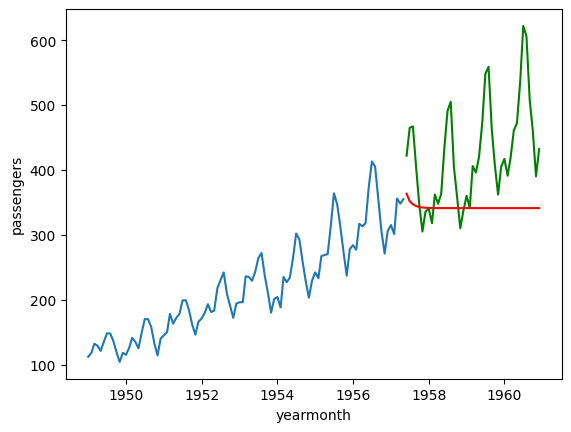

In [ ]:
sns.lineplot(data=train, x=train.index, y='passengers')
sns.lineplot(data=test, x=test.index, y='passengers', color='green')
sns.lineplot(data=airP, x=airP.index, y='arima_pred', color='red')


<Axes: xlabel='yearmonth', ylabel='arima_pred'>

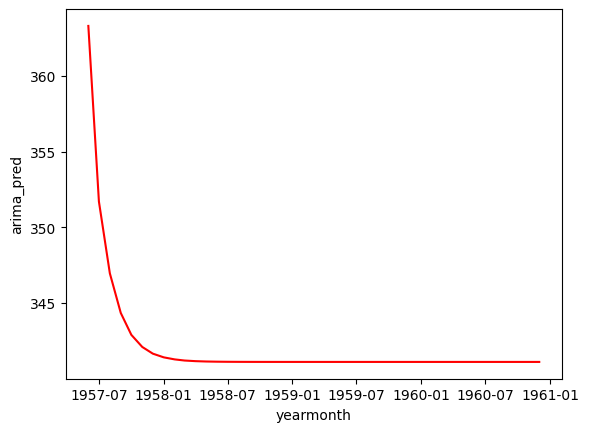

In [ ]:
#let's drop the NAN values and comapre
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y='arima_pred', color='red')

In [ ]:
#let's check the error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

111.1101033142743

This results isn't good enough

##SARIMAX
Let's try the SARIMA model. We can use the same values for p,d,q as we used ofr ARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model1 = SARIMAX(train['passengers'], order=(1,1,3), seasonal_order=(1,1,3,12))
model_fit1 = model1.fit()
prediction1 = model_fit1.predict(start=test.index[0], end=test.index[-1])
airP['sarimax_pred'] = prediction1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
airP.tail()

,passengers,firstdiff,diff12,arima_pred,sarimax_pred
yearmonth,,,,,
1960-08-01,606,-16.0,47.0,341.111333,599.426270
1960-09-01,508,-98.0,45.0,341.111333,534.545059
1960-10-01,461,-47.0,54.0,341.111333,479.577349
1960-11-01,390,-71.0,28.0,341.111333,431.919762
1960-12-01,432,42.0,27.0,341.111333,477.429250


<Axes: xlabel='yearmonth', ylabel='arima_pred'>

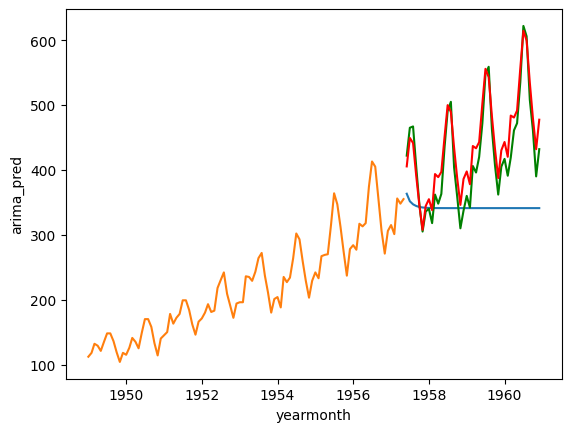

In [ ]:
sns.lineplot(data=airP, x=airP.index, y='arima_pred')
sns.lineplot(data=train,x=train.index, y=train['passengers'])
sns.lineplot(data=test, x=test.index, y=test['passengers'], color='green')
sns.lineplot(data=airP, x=airP.index, y='sarimax_pred', color='red')

In [ ]:
#let's get the error  margin
np.sqrt(mean_squared_error(test['passengers'], prediction1))

27.68175159393607

This is good but let's tweak the model to see if we can get a better result. The paramters we will fine tune are p,d,q.

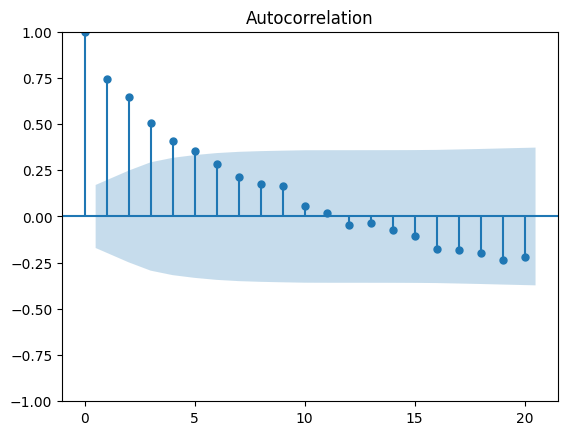

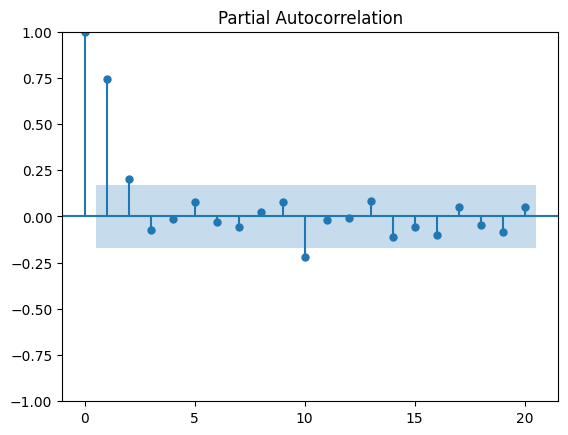

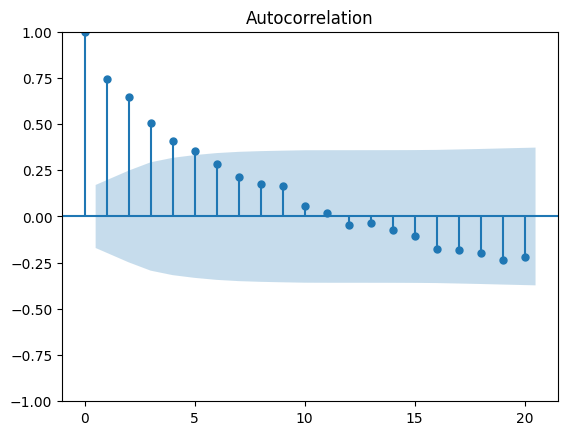

In [ ]:
plot_pacf(airP['diff12'].dropna(), lags=20)
plot_acf(airP['diff12'].dropna(), lags=20)

- ACF:3,4,5 --->Q
- PACF: 2,3,10 ---> P

In [ ]:
model2 = SARIMAX(train['passengers'], order=(10,1,5), seasonal_order=(10,1,5,12))
model_fit2 = model2.fit()
prediction2 = model_fit2.predict(start=test.index[0], end=test.index[-1])
airP['sarimax_pred2'] = prediction2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observation

In [ ]:
airP.tail()

,passengers,firstdiff,diff12,arima_pred,sarimax_pred,sarimax_pred2
yearmonth,,,,,,
1960-08-01,606,-16.0,47.0,341.111333,600.141714,559.596262
1960-09-01,508,-98.0,45.0,341.111333,537.427467,492.944095
1960-10-01,461,-47.0,54.0,341.111333,480.792783,440.768199
1960-11-01,390,-71.0,28.0,341.111333,434.103183,399.075611
1960-12-01,432,42.0,27.0,341.111333,480.141264,449.533142


<Axes: xlabel='yearmonth', ylabel='arima_pred'>

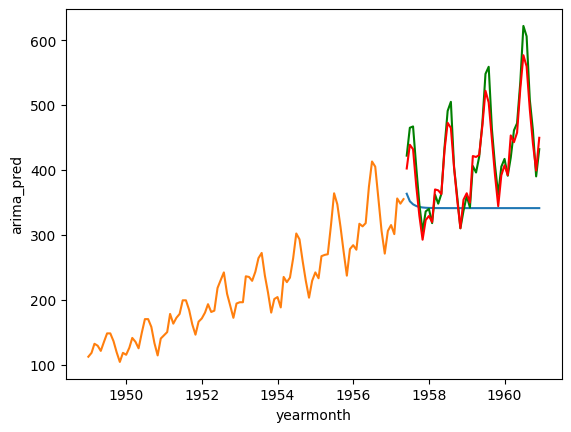

In [ ]:
sns.lineplot(data=airP, x=airP.index, y='arima_pred')
sns.lineplot(data=train,x=train.index, y=train['passengers'])
sns.lineplot(data=test, x=test.index, y=test['passengers'], color='green')
sns.lineplot(data=airP, x=airP.index, y='sarimax_pred2', color='red')



In [ ]:
#let's get the error  margin
np.sqrt(mean_squared_error(test['passengers'], prediction1))

29.177761838630126

##Observation
1. After testing out mutplie variations of p and q, the best resuls were gotten where p=1 and q=3
2. (P=10 AND Q=5) is better are predicting passenger count at the lower limits.
3. (P=1,Q=3) has a better prediction for the higer limits.

##Future prediction
Let's generate the date for future prediction. We will take the last date and project intothe future.

In [ ]:
#creates a list of a date tange and then converts it to a Dataframe
future_date = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['dates'])
future_date.set_index('dates', inplace=True)
future_date.head()

""
dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [ ]:
future_pred = model_fit1.predict(start=future_date.index[0], end=future_date.index[-1])
future_date['future prediction'] = future_pred

<Axes: xlabel='dates'>

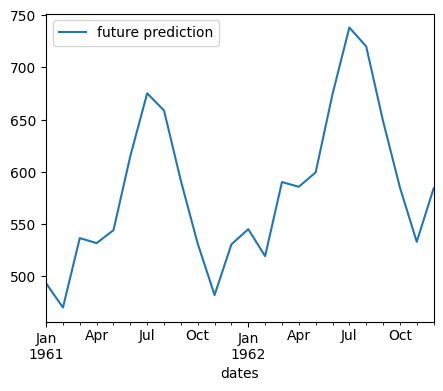

In [ ]:
future_date.plot(figsize=(5,4))

<Axes: xlabel='yearmonth', ylabel='arima_pred'>

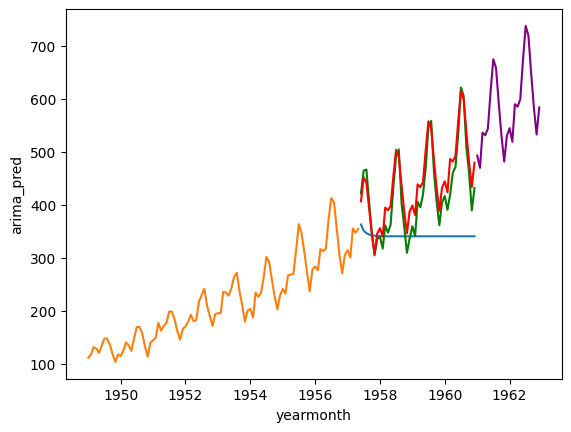

In [ ]:
sns.lineplot(data=airP, x=airP.index, y='arima_pred')
sns.lineplot(data=train,x=train.index, y=train['passengers'])
sns.lineplot(data=test, x=test.index, y=test['passengers'], color='green')
sns.lineplot(data=airP, x=airP.index, y='sarimax_pred', color='red')
sns.lineplot(data=future_date, x=future_date.index, y='future prediction', color='purple')

This is great the predictions model the real data.